In [8]:
import os
import pandas as pd
import numpy as np
from scipy.io import loadmat

import matplotlib.pyplot as plt
plt.rcParams['font.size']=12

from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/Othercomputers/MacBook-Air/CSE 847 Machine Learninng/MSU-CSE-847-Homeworks/HW-05"
os.makedirs("plots", exist_ok = True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Othercomputers/MacBook-Air/CSE 847 Machine Learninng/MSU-CSE-847-Homeworks/HW-05


## 2.1 Principal Component Analysis Demonstration

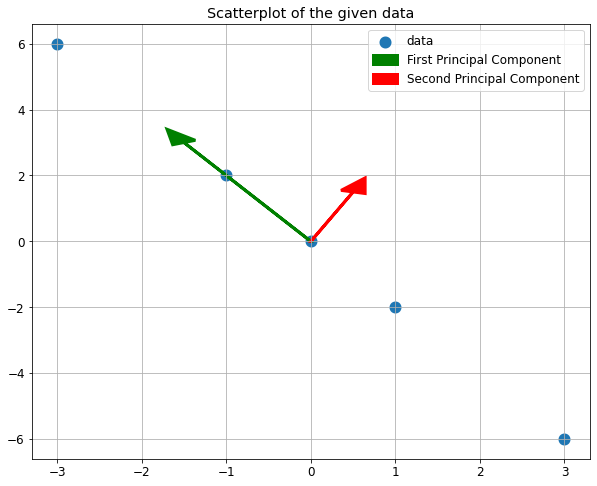

In [9]:
data = np.array([[0, 0],[-1, 2],[-3, 6],[1, -2],[3, -6]])
 
plt.figure(figsize=(10,8))
dt = plt.scatter(data[:,0], data[:, 1], marker='o', linewidth=6, label="data")
p1 = plt.arrow(0, 0, -1.5, 3, linewidth=3, color='g', head_width = 0.3, label="First Principal Component")
p2 = plt.arrow(0, 0, 0.5, 1.5, color='r', linewidth=3, head_width=0.3)
plt.title('Scatterplot of the given data')
plt.grid(); plt.legend([dt, p1, p2], ["data", "First Principal Component", "Second Principal Component"]);
plt.savefig('plots/scatter-data.png',  dpi=200)

## 2.2 Principal Component Analysis

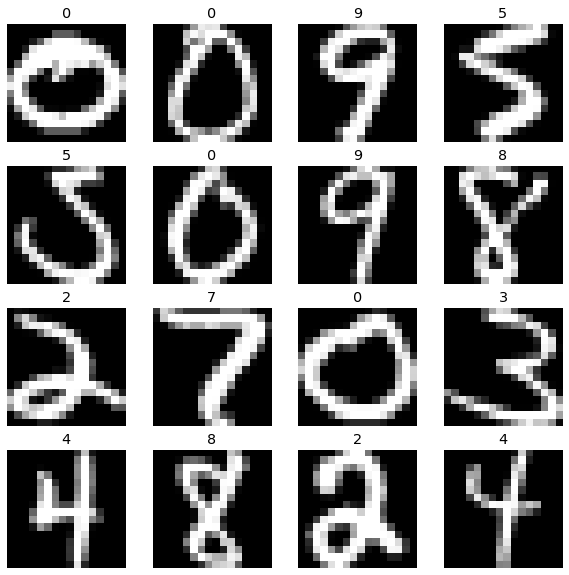

In [10]:
# Loading the Data
images = np.array(loadmat("USPS.mat")["A"]).reshape(-1, 16, 16)
labels = loadmat("USPS.mat")["L"]
classes = [str(i) for i in range(10)]



rows, cols = 4,4
fig = plt.figure(figsize=(rows*2.5, cols*2.5))
for i in range(rows*cols):
    idx = np.random.randint(low=0, high=3000)
    ax1 = fig.add_subplot(rows, cols, i+1)
    ax1.imshow(images[idx].squeeze(), cmap="gray")
    ax1.set_title(classes[int(labels[idx])])
    ax1.axis('off')
plt.savefig("plots/Original Images.png", dpi = 200)

# PCA step by step
Here is the short summary of the required steps:
* **Scale the data** — we don’t want some feature to be voted as “more important” due to scale differences. 10m = 10000mm, but the algorithm isn’t aware of meters and millimeters
* **Calculate covariance matrix** — square matrix giving the covariances between each pair of elements of a random vector
* **Eigen Decomposition**


# Scale the Data:
Standardize features by removing the mean and scaling to unit variance. The standard score of a sample x is calculated as: $$z = \frac{(x - u)}{s}$$
where $u$ is the mean of the training samples or zero if `with_mean=False`, and $s$ is the standard deviation of the training samples or one if `with_std=False`.

In [11]:
data = images.reshape(-1, 256)
mean_ = data.mean(axis =0)
std_ = data.std(axis=0)
X_scaled = (data-mean_)/std_


# Calculate Covariance Matrix:
Let’s take a step back here and understand the difference between variance and covariance. Variance reports variation of a single random variable — let’s say the weight of a person, and covariance reports how much two random variables vary — like weight and height of a person.
On the diagonal of the covariance matrix we have variances, and other elements are the covariances.

In [12]:
print(f'Shape of X_scaled: {X_scaled.shape}')
features = X_scaled.T
print(f'Shape of features: {features.shape}')
cov_matrix = np.cov(features)
print(f'Shape of cov_matrix: {cov_matrix.shape}')
print('\nSneak Peak of the covariance matrix:\n')
cov_matrix[0:5, 0:5]

Shape of X_scaled: (3000, 256)
Shape of features: (256, 3000)
Shape of cov_matrix: (256, 256)

Sneak Peak of the covariance matrix:



array([[1.00033344, 0.6824501 , 0.36418822, 0.19804714, 0.1227057 ],
       [0.6824501 , 1.00033344, 0.76097963, 0.43048123, 0.25424327],
       [0.36418822, 0.76097963, 1.00033344, 0.73621171, 0.45001854],
       [0.19804714, 0.43048123, 0.73621171, 1.00033344, 0.76833188],
       [0.1227057 , 0.25424327, 0.45001854, 0.76833188, 1.00033344]])

As you can see, the diagonal elements are identical, and the matrix is symmetrical. Up next, eigendecomposition.

# Eigendecomposition
`Eigendecomposition is a process that decomposes a square matrix into eigenvectors and eigenvalues.` <font color='red'>Eigenvectors are simple unit vectors</font>, and <font color='green'>eigenvalues are coefficients which give the magnitude to the eigenvectors. </font>

We know so far that our `covariance matrix is symmetrical.` As it turns out, `eigenvectors of symmetric matrices are orthogonal.` For PCA this means that we have the first principal component which explains most of the variance. Orthogonal to that is the second principal component, which explains most of the remaining variance. This is repeated for N number of principal components, where N equals to number of original features.

And this turns out to be neat for us — principal components are sorted by percentage of variance explained, as we can decide how many should we keep. For example, if we have 100 features originally, but the first 3 principal components explain 95% of the variance, then it makes sense to keep only these 3 for visualizations and model training.


In [13]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)



print(f'First 10 eigenvalues: {eig_values[:10]}')
print(f'\n\nLast 10 eigenvalues: {eig_values[-10:]}')

First 10 eigenvalues: [32.85031219 19.76212514 15.95208523 13.56784374 10.58756227  9.92717367
  8.86040066  8.06633975  6.61391298  5.66625189]


Last 10 eigenvalues: [0.05410441 0.04760493 0.04932408 0.05206423 0.05448948 0.04335699
 0.04492353 0.04444536 0.04515626 0.05463324]


### Displaying All Eigenvalues

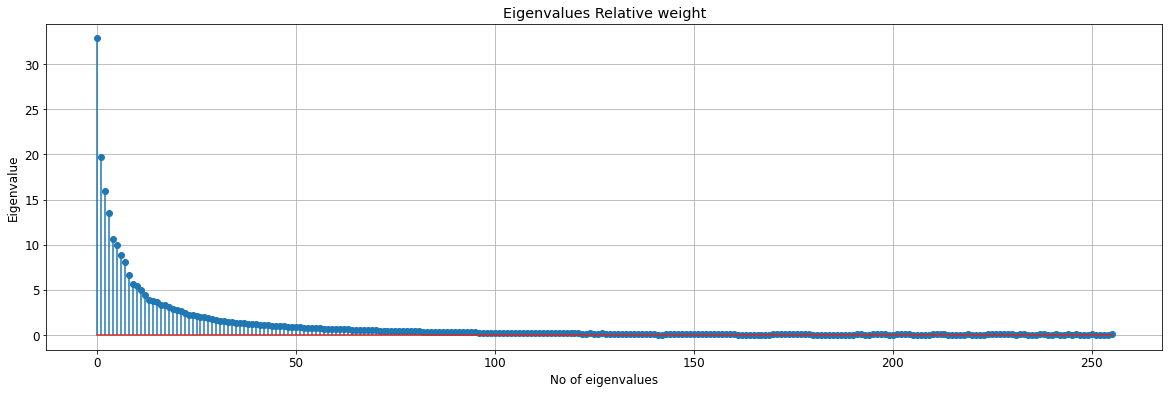

In [14]:
plt.figure(figsize=(20,6))
plt.stem(eig_values, use_line_collection = True)
plt.title('Eigenvalues Relative weight')
plt.xlabel('No of eigenvalues')
plt.ylabel("Eigenvalue")
plt.grid()
plt.savefig(os.path.join('plots', "eigen_values.png"), dpi=200)

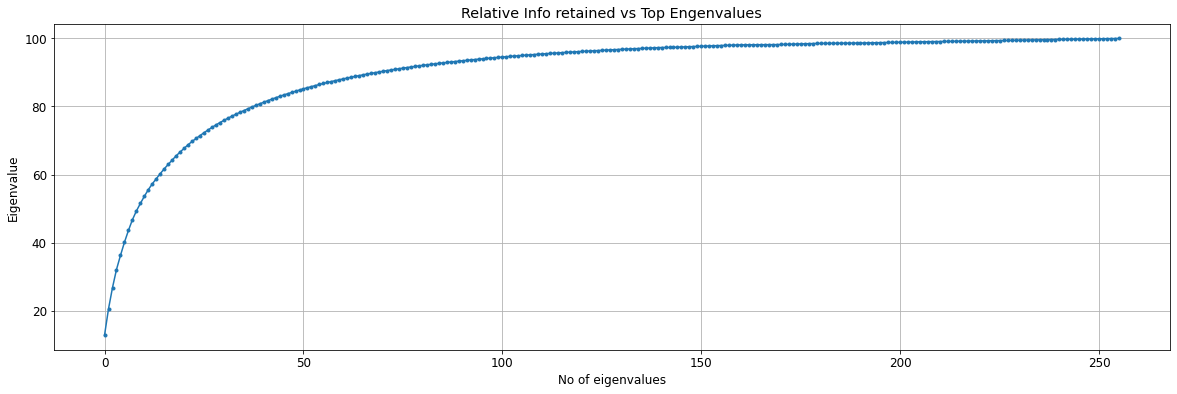

In [15]:
plt.figure(figsize=(20,6))
plt.plot(np.cumsum(eig_values)/eig_values.sum()*100, marker='.')
plt.title('Relative Info retained vs Top Engenvalues')
plt.xlabel('No of eigenvalues')
plt.ylabel("Eigenvalue")
plt.grid()
plt.savefig(os.path.join('plots', "eigen_values.png"), dpi=200)

### Calculating Reconstruction Error

Top 10 eigenvalues reconstruction error is 0.4851169680141302
Top 50 eigenvalues reconstruction error is 0.15148286124970767
Top 100 eigenvalues reconstruction error is 0.05554294520463632
Top 150 eigenvalues reconstruction error is 0.02324100757221992
Top 200 eigenvalues reconstruction error is 0.011267639821365805


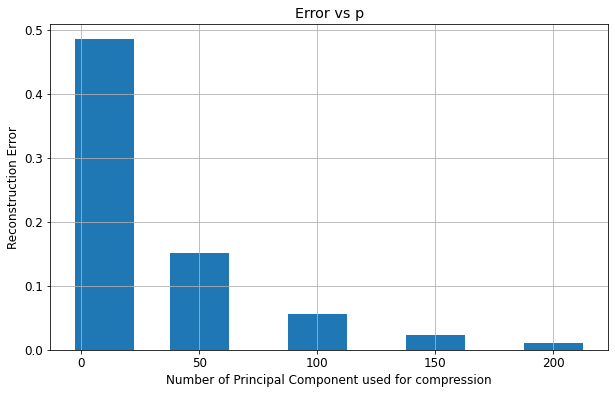

In [16]:
ps = [10, 50, 100, 150, 200]
errs = []
for p in ps:
    eig_values_selected = eig_values[:p]
    error = 1 - np.cumsum(eig_values_selected)[-1]/eig_values.sum()
    errs.append(error)

    print(f"Top {p} eigenvalues reconstruction error is {error}")

plt.figure(figsize=(10,6))
plt.title('Error vs p')
plt.xlabel("Number of Principal Component used for compression")
plt.ylabel("Reconstruction Error")
plt.bar(ps, errs, width=25)
plt.grid()
plt.savefig("plots/reconstruction_errors.png", dpi=200)

# Reconstruction from Principal Component
## Reduction/Compression Phase:

In [17]:
reduced_eigen_space = eig_vectors[:, :150]

In [18]:
print(f'Shape of X_scaled: {X_scaled.shape}')
print(f'Shape of reduced_eigen_space: {reduced_eigen_space.shape}')
X_compressed = np.dot(X_scaled, reduced_eigen_space)
print(f'Shape of X_compressed: {X_compressed.shape}')

Shape of X_scaled: (3000, 256)
Shape of reduced_eigen_space: (256, 150)
Shape of X_compressed: (3000, 150)


In [19]:
print(f'Shape of X_compressed: {X_compressed.shape}')
print(f'Shape of reduced_eigen_space: {reduced_eigen_space.shape}')
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
print(f'Shape of X_reconstructed: {X_reconstructed.shape}')

Shape of X_compressed: (3000, 150)
Shape of reduced_eigen_space: (256, 150)
Shape of X_reconstructed: (3000, 256)


In [20]:
data_reconstructed = (X_reconstructed * std_ ) + mean_
reconstructed_images = np.reshape(data_reconstructed, (-1, 16, 16))

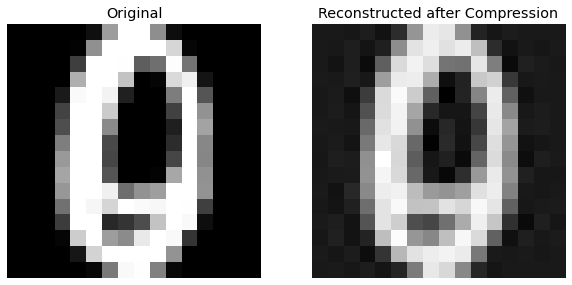

In [21]:
rec_index = 1
f = plt.figure(figsize=(10,6))
ax1 = f.add_subplot(1,2,1)
plt.imshow(images[rec_index].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[rec_index].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)
rec_index +=1


In [22]:
def compress_images(X_scaled, eig_vectors, p):
    reduced_eigen_space = eig_vectors[:, :p]
    X_compressed = np.dot(X_scaled, reduced_eigen_space)
    X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
    return X_reconstructed

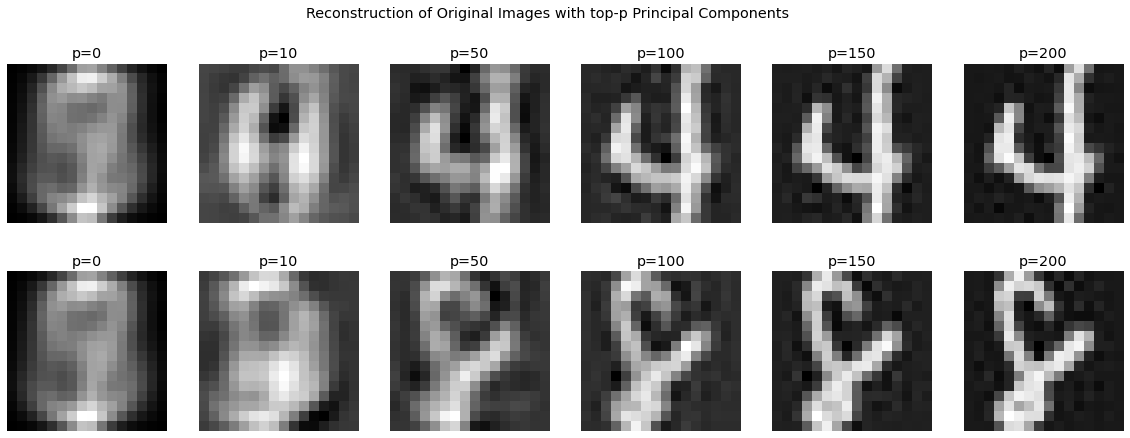

In [23]:
plt.rc

fig = plt.figure(figsize=(20,7))
ps = [0, 10, 50, 100, 150, 200]

for i, p in enumerate(ps):
    # Preparing the image in the compression state
    X_reconstructed = compress_images(X_scaled[[1200, 2699]], eig_vectors, p= p)
    data_reconstructed = (X_reconstructed * std_ ) + mean_
    reconstructed_images = np.reshape(data_reconstructed, (-1, 16, 16))

    # Subplotting the images
    fig.add_subplot(2, len(ps), i+1)
    plt.imshow(reconstructed_images[0], cmap="gray"); plt.title(f"p={p}");plt.axis('off')
    fig.add_subplot(2, len(ps), i+len(ps)+1)
    plt.imshow(reconstructed_images[1], cmap="gray"); plt.title(f"p={p}") ;plt.axis('off')

# Saving the image
plt.suptitle('Reconstruction of Original Images with top-p Principal Components')
plt.savefig('plots/reconstruction_1200_2699.png', dpi=200)